In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'
import matplotlib.colors as colors
import cmocean.cm as cmo
from glob import glob
# import xgcm

In [2]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 31.34 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44787,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 31.34 GiB
Comm: tcp://127.0.0.1:35779,Total threads: 1
Dashboard: http://127.0.0.1:41183/status,Memory: 7.84 GiB
Nanny: tcp://127.0.0.1:38263,


In [3]:
import datetime
import nc_time_axis

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cartopy
import matplotlib.path as mpath

In [5]:
GRIDT_data_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-T_clim/*gridTclim.nc"
ICEMOD_data_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-icemod_clim/*icemodclim.nc"
NSQUARE_data_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-Nsquared/clim/*5d_Nsquared.nc"
EKE_data_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-EKE/clim/*EKEclim.nc"
MKE_data_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-MKE/clim/*MKE.nc"
SHEAR_data_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-shear/clim/*shear.nc"

In [6]:
GRIDT_data_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-T_clim/*gridTclim.nc"
ICEMOD_data_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-icemod_clim/*icemodclim.nc"
NSQUARE_data_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-Nsquared/clim/*5d_Nsquared.nc"
EKE_data_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-EKE/clim/*EKEclim.nc"
MKE_data_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-MKE/clim/*MKE.nc"
SHEAR_data_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-shear/clim/*shear.nc"

In [8]:
def prepro(ds):
    return ds.isel(y=slice(800, None))

In [10]:
grid_files = "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mesh_hgr.nc"
coords_file = "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/coordinates_CREG12_lbclnk_noz_vh20160930.nc"
mask_file= "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mask.nc"


In [11]:
grid = xr.open_mfdataset(grid_files, parallel=True, preprocess=prepro)
coords = xr.open_mfdataset(coords_file, parallel=True, preprocess=prepro)
mask = xr.open_mfdataset(mask_file, parallel=True, preprocess=prepro)

In [58]:
GRIDT_REF = xr.open_mfdataset(GRIDT_data_filesREF, preprocess=prepro, parallel=True)
GRIDT_REF = GRIDT_REF.assign_coords({"nav_lon":grid.nav_lon,"nav_lat":grid.nav_lat})

In [59]:
GRIDT_FUT = xr.open_mfdataset(GRIDT_data_filesFUT, preprocess=prepro, parallel=True)
GRIDT_FUT = GRIDT_FUT.assign_coords({"nav_lon":grid.nav_lon,"nav_lat":grid.nav_lat})

In [60]:
data2plot_rho_t0 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/transects/density_transect_0.nc')
data2plot_rho_t1 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/transects/density_transect_1.nc')

In [61]:
data2plot_REF_rho_masked  = data2plot_rho_t0.rhop_sig0_ref_t0.where(data2plot_rho_t0.rhop_sig0_ref_t0> 1000)
data2plot_REF_rho = data2plot_REF_rho_masked.isel(diag=slice(0,500)).mean("diag").compute()
data2plot_FUT_rho_masked  = data2plot_rho_t0.rhop_sig0_fut_t0.where(data2plot_rho_t0.rhop_sig0_fut_t0> 1000)
data2plot_FUT_rho = data2plot_FUT_rho_masked.isel(diag=slice(0,500)).mean("diag").compute()

In [62]:
data2plot_icethic_t0 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/transects/sithic_transect_0.nc')
data2plot_icethic_t1 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/transects/sithic_transect_1.nc')

In [63]:
data2plot_REF_icethick  = data2plot_icethic_t0.sithic_ref_t0.where(np.isfinite(data2plot_REF_rho_masked.isel(deptht=0))).isel(diag=slice(0,500)).mean("diag").compute()
data2plot_FUT_icethick  = data2plot_icethic_t0.sithic_fut_t0.where(np.isfinite(data2plot_FUT_rho_masked.isel(deptht=0))).isel(diag=slice(0,500)).mean("diag").compute()

In [64]:
diag_transect_MKE_t0 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/transects/MKE_transect_0.nc')
diag_transect_MKE_t1 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/transects/MKE_transect_1.nc')

In [65]:
diag_transect_EKE_t0 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/transects/EKE_transect_0.nc')
diag_transect_EKE_t1 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/transects/EKE_transect_1.nc')

In [66]:
data2plot_REF_MKE = diag_transect_MKE_t0.vomke_ref_t0.where(np.isfinite(data2plot_REF_rho_masked)).isel(diag=slice(0,500)).mean("diag").compute()
data2plot_FUT_MKE = diag_transect_MKE_t0.vomke_fut_t0.where(np.isfinite(data2plot_FUT_rho_masked)).isel(diag=slice(0,500)).mean("diag").compute()
data2plot_REF_EKE = diag_transect_EKE_t0.voeke_ref_t0.where(np.isfinite(data2plot_REF_rho_masked)).isel(diag=slice(0,500)).mean("diag").compute()
data2plot_FUT_EKE = diag_transect_EKE_t0.voeke_fut_t0.where(np.isfinite(data2plot_FUT_rho_masked)).isel(diag=slice(0,500)).mean("diag").compute()

In [67]:
REF_days = data2plot_REF_MKE['time_counter.dayofyear']

data2plot_REF_MKE['days'] = REF_days
data2plot_REF_EKE['days'] = REF_days
data2plot_REF_icethick['days'] = REF_days
data2plot_REF_rho['days'] = REF_days

data2plot_REF_MKE = data2plot_REF_MKE.swap_dims({"time_counter": "days"})
data2plot_REF_EKE = data2plot_REF_EKE.swap_dims({"time_counter": "days"})
data2plot_REF_icethick = data2plot_REF_icethick.swap_dims({"time_counter": "days"})
data2plot_REF_rho = data2plot_REF_rho.swap_dims({"time_counter": "days"})

FUT_days = data2plot_FUT_MKE['time_counter.dayofyear']

data2plot_FUT_MKE['days'] = FUT_days
data2plot_FUT_EKE['days'] = FUT_days
data2plot_FUT_icethick['days'] = FUT_days
data2plot_FUT_rho['days'] = REF_days

data2plot_FUT_MKE = data2plot_FUT_MKE.swap_dims({"time_counter": "days"})
data2plot_FUT_EKE = data2plot_FUT_EKE.swap_dims({"time_counter": "days"})
data2plot_FUT_icethick = data2plot_FUT_icethick.swap_dims({"time_counter": "days"})
data2plot_FUT_rho = data2plot_FUT_rho.swap_dims({"time_counter": "days"})

In [68]:
from matplotlib.gridspec import GridSpec

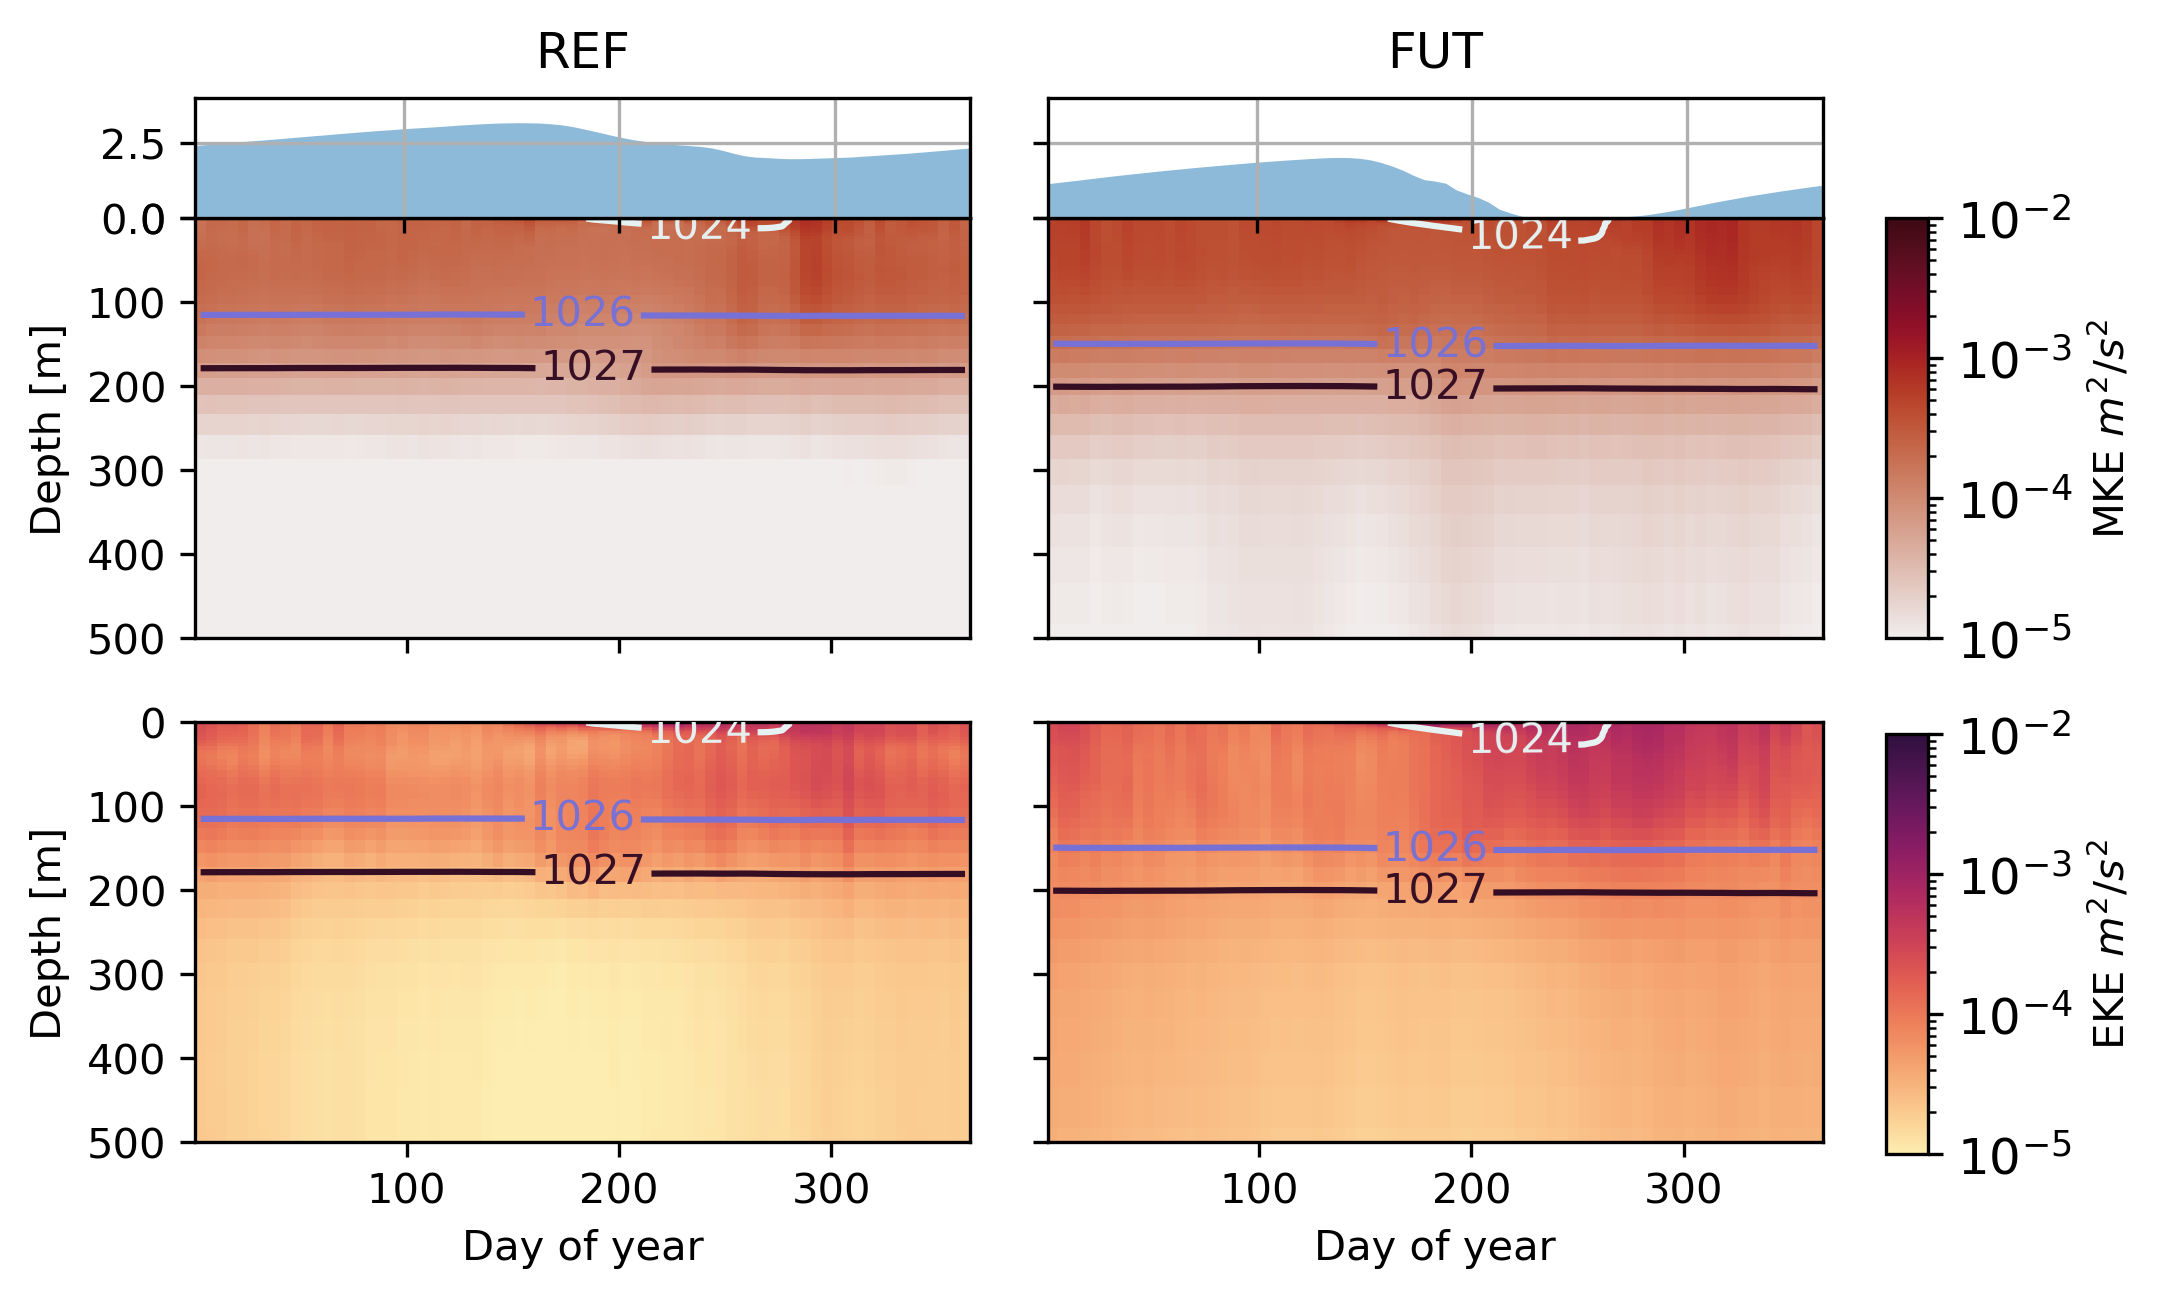

In [42]:
import matplotlib.ticker as mticker
fig = plt.figure(figsize=(7, 4),dpi=300)

gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1],sharey=ax1)
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1],sharey=ax1)

plt.subplots_adjust(wspace=0.1)

##################################################################################################

plot_kwargs= {'cmap':cmo.amp, 'norm':colors.LogNorm(vmin=1e-5, vmax=1e-2),  'add_colorbar':False}

MKE_cbar = data2plot_REF_MKE.plot(x="days", ax=ax1, **plot_kwargs)

cs = data2plot_REF_rho.where(data2plot_REF_rho> 1000).plot.contour(x='days',ax=ax1,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax1.clabel(cs, inline=1, fontsize=10)

ice_ax1 = fig.add_axes([ax1.get_position().x0,ax1.get_position().y1,ax1.get_position().width,0.1])
ice_ax1.fill_between(data2plot_REF_icethick.days.values,data2plot_REF_icethick*0,data2plot_REF_icethick,alpha=0.5)
ice_ax1.grid()
ice_ax1.set_ylim((0,4))
ice_ax1.set_xlim((data2plot_REF_icethick.days.values[0],data2plot_REF_icethick.days.values[-1]))
ice_ax1.xaxis.set_ticklabels([])

##################################################################################################

data2plot_FUT_MKE.plot(x="days", ax=ax2, **plot_kwargs)

cs = data2plot_FUT_rho.where(data2plot_FUT_rho> 1000).plot.contour(x='days',ax=ax2,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax2.clabel(cs, inline=1, fontsize=10)

ice_ax2 = fig.add_axes([ax2.get_position().x0,ax2.get_position().y1,ax2.get_position().width,0.1])
ice_ax2.fill_between(data2plot_FUT_icethick.days.values,data2plot_FUT_icethick*0,data2plot_FUT_icethick,alpha=0.5)
ice_ax2.grid()
ice_ax2.set_ylim((0,4))
ice_ax2.set_xlim((data2plot_FUT_icethick.days.values[0],data2plot_FUT_icethick.days.values[-1]))
ice_ax2.xaxis.set_ticklabels([])

##################################################################################################
plot_kwargs= {'cmap':cmo.matter, 'norm':colors.LogNorm(vmin=1e-5, vmax=1e-2),  'add_colorbar':False}

EKE_cbar = data2plot_REF_EKE.plot(x="days", ax=ax3, **plot_kwargs)
cs = data2plot_REF_rho.where(data2plot_REF_rho> 1000).plot.contour(x='days',ax=ax3,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax3.clabel(cs, inline=1, fontsize=10)

data2plot_FUT_EKE.plot(x="days", ax=ax4, **plot_kwargs)
cs = data2plot_FUT_rho.where(data2plot_FUT_rho> 1000).plot.contour(x='days',ax=ax4,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax4.clabel(cs, inline=1, fontsize=10)

##################################################################################################
axis = [ax1,ax2,ax3,ax4]

[ ax.set_ylim((0,500)) for ax in axis ]
[ ax.invert_yaxis() for ax in axis ]
[ ax.set_xlabel('') for ax in axis ]
[ ax.set_ylabel('') for ax in axis ]

[ ax.set_ylabel('Depth [m]') for ax in [ax1,ax3] ]

[ ax.set_xlabel('Day of year') for ax in [ax3,ax4] ]

##################################################################################################

cax = plt.axes((0.93, 0.53, 0.02, 0.35))
cbar = plt.colorbar(MKE_cbar, cax=cax,orientation='vertical')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"MKE $m^2/s^2$")

cax = plt.axes((0.93, 0.1, 0.02, 0.35))
cbar = plt.colorbar(EKE_cbar, cax=cax,orientation='vertical')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"EKE $m^2/s^2$")


ax1.set_title("REF",y=1.3)
ax2.set_title("FUT",y=1.3)


plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ice_ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)

plt.savefig('./figures/Hovmoller_MKE_EKE_transect.pdf', bbox_inches='tight')

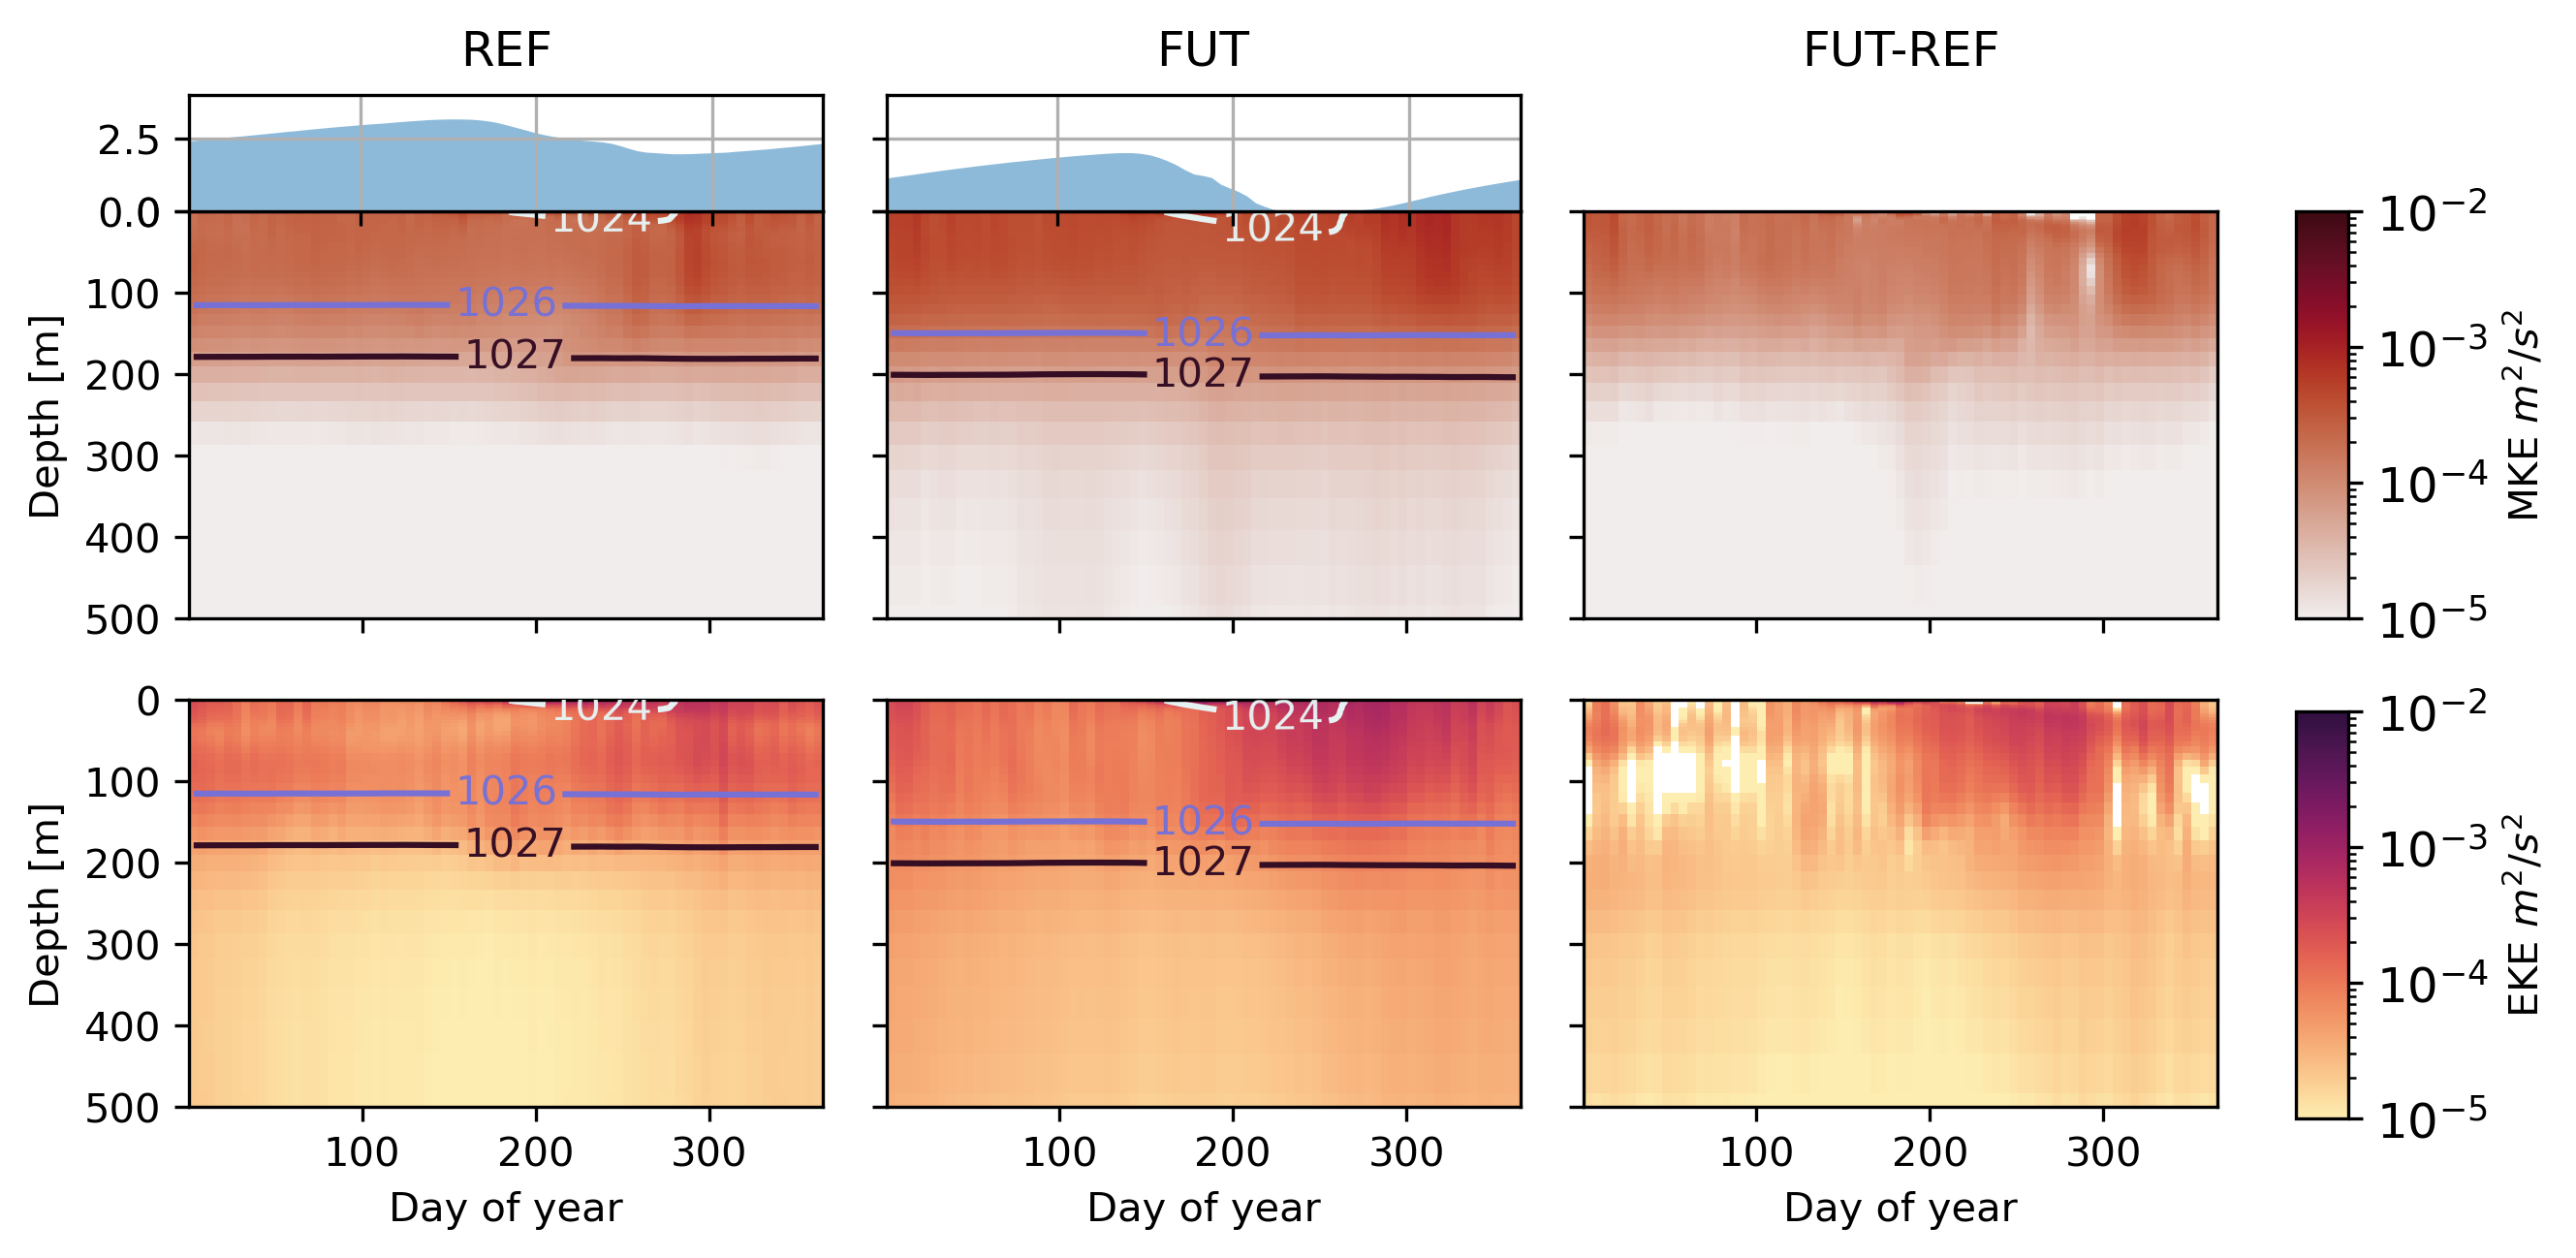

In [213]:
import matplotlib.ticker as mticker
fig = plt.figure(figsize=(9, 4),dpi=300)

gs = GridSpec(2, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

ax5 = fig.add_subplot(gs[0, 2])
ax6 = fig.add_subplot(gs[1, 2])

plt.subplots_adjust(wspace=0.1)

##################################################################################################

plot_kwargs= {'cmap':cmo.amp, 'norm':colors.LogNorm(vmin=1e-5, vmax=1e-2),  'add_colorbar':False}

MKE_cbar = data2plot_REF_MKE.plot(x="days", ax=ax1, **plot_kwargs)

cs = data2plot_REF_rho.where(data2plot_REF_rho> 1000).plot.contour(x='days',ax=ax1,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax1.clabel(cs, inline=1, fontsize=10)

ice_ax1 = fig.add_axes([ax1.get_position().x0,ax1.get_position().y1,ax1.get_position().width,0.1])
ice_ax1.fill_between(data2plot_REF_icethick.days.values,data2plot_REF_icethick*0,data2plot_REF_icethick,alpha=0.5)
ice_ax1.grid()
ice_ax1.set_ylim((0,4))
ice_ax1.set_xlim((data2plot_REF_icethick.days.values[0],data2plot_REF_icethick.days.values[-1]))
ice_ax1.xaxis.set_ticklabels([])

##################################################################################################

data2plot_FUT_MKE.plot(x="days", ax=ax2, **plot_kwargs)

cs = data2plot_FUT_rho.where(data2plot_FUT_rho> 1000).plot.contour(x='days',ax=ax2,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax2.clabel(cs, inline=1, fontsize=10)

ice_ax2 = fig.add_axes([ax2.get_position().x0,ax2.get_position().y1,ax2.get_position().width,0.1])
ice_ax2.fill_between(data2plot_FUT_icethick.days.values,data2plot_FUT_icethick*0,data2plot_FUT_icethick,alpha=0.5)
ice_ax2.grid()
ice_ax2.set_ylim((0,4))
ice_ax2.set_xlim((data2plot_FUT_icethick.days.values[0],data2plot_FUT_icethick.days.values[-1]))
ice_ax2.xaxis.set_ticklabels([])

##################################################################################################
plot_kwargs= {'cmap':cmo.matter, 'norm':colors.LogNorm(vmin=1e-5, vmax=1e-2),  'add_colorbar':False}

EKE_cbar = data2plot_REF_EKE.plot(x="days", ax=ax3, **plot_kwargs)
cs = data2plot_REF_rho.where(data2plot_REF_rho> 1000).plot.contour(x='days',ax=ax3,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax3.clabel(cs, inline=1, fontsize=10)

data2plot_FUT_EKE.plot(x="days", ax=ax4, **plot_kwargs)
cs = data2plot_FUT_rho.where(data2plot_FUT_rho> 1000).plot.contour(x='days',ax=ax4,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax4.clabel(cs, inline=1, fontsize=10)

##################################################################################################
plot_kwargs= {'cmap':cmo.amp, 'norm':colors.LogNorm(vmin=1e-5, vmax=1e-2),  'add_colorbar':False}

MKE_diff_cbar = (data2plot_FUT_MKE - data2plot_REF_MKE).plot(x="days", ax=ax5, **plot_kwargs)

plot_kwargs= {'cmap':cmo.matter, 'norm':colors.LogNorm(vmin=1e-5, vmax=1e-2),  'add_colorbar':False}

EKE_diff_cbar = (data2plot_FUT_EKE - data2plot_REF_EKE).plot(x="days", ax=ax6, **plot_kwargs)

##################################################################################################
axis = [ax1, ax2, ax3, ax4, ax5, ax6]

[ ax.set_ylim((0,500)) for ax in axis ]

[ ax.invert_yaxis() for ax in axis ]

[ ax.set_xlabel('') for ax in axis ]
[ ax.set_ylabel('') for ax in axis ]

[ ax.set_ylabel('Depth [m]') for ax in [ax1,ax3] ]

[ ax.set_xlabel('Day of year') for ax in [ax3,ax4,ax6] ]

##################################################################################################

cax = plt.axes((0.93, 0.53, 0.02, 0.35))
cbar = plt.colorbar(MKE_cbar, cax=cax,orientation='vertical')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"MKE $m^2/s^2$")

cax = plt.axes((0.93, 0.1, 0.02, 0.35))
cbar = plt.colorbar(EKE_cbar, cax=cax,orientation='vertical')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"EKE $m^2/s^2$")


ax1.set_title("REF",y=1.3)
ax2.set_title("FUT",y=1.3)

ax5.set_title("FUT-REF",y=1.3)


plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ice_ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)
plt.setp(ax6.get_yticklabels(), visible=False)

plt.savefig('./figures/Hovmoller_MKE_EKE_transect_diff.pdf', bbox_inches='tight')

In [69]:
data2plot_REF_MKE_anom = data2plot_REF_MKE - data2plot_REF_MKE.mean("days") 
data2plot_FUT_MKE_anom = data2plot_FUT_MKE - data2plot_FUT_MKE.mean("days") 

data2plot_REF_EKE_anom = data2plot_REF_EKE - data2plot_REF_EKE.mean("days") 
data2plot_FUT_EKE_anom = data2plot_FUT_EKE - data2plot_FUT_EKE.mean("days") 

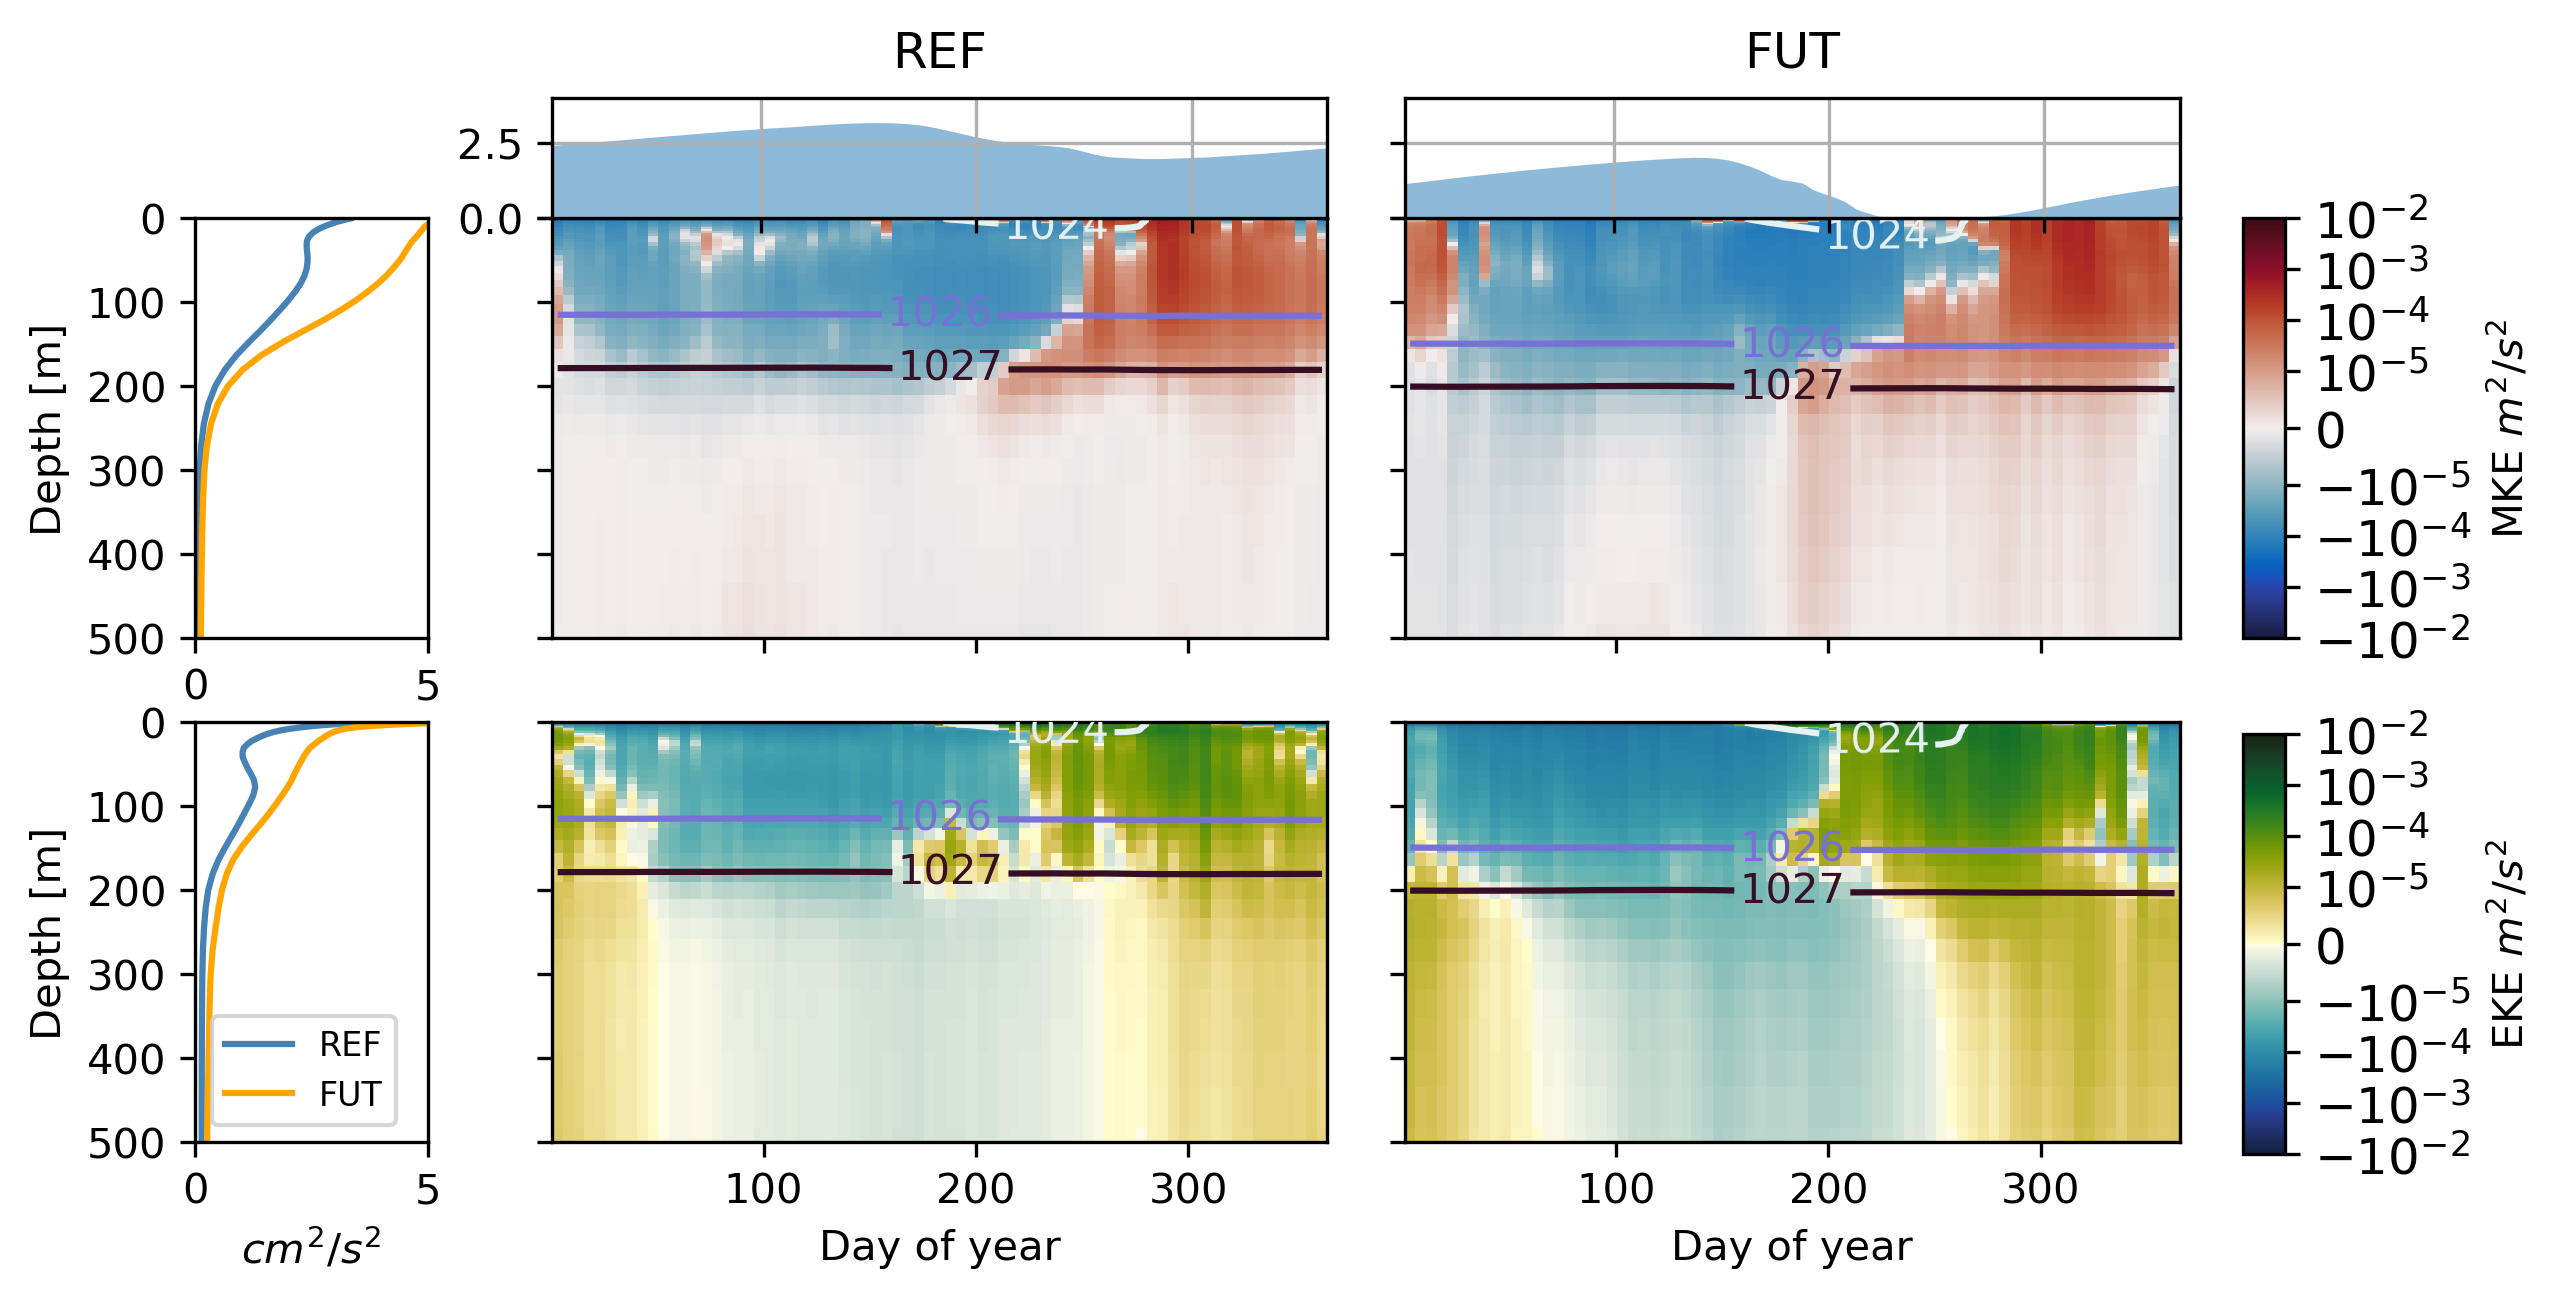

In [83]:
import matplotlib.ticker as mticker
fig = plt.figure(figsize=(7, 4),dpi=300)

gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1],sharey=ax1)
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1],sharey=ax1)

plt.subplots_adjust(wspace=0.1)

##################################################################################################

plot_kwargs= {'cmap':cmo.balance, 'norm':colors.SymLogNorm(linthresh=1e-5, vmin=-1e-2, vmax=1e-2),  'add_colorbar':False}

MKE_cbar = data2plot_REF_MKE_anom.plot(x="days", ax=ax1, **plot_kwargs)

cs = data2plot_REF_rho.where(data2plot_REF_rho> 1000).plot.contour(x='days',ax=ax1,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax1.clabel(cs, inline=1, fontsize=10)

ice_ax1 = fig.add_axes([ax1.get_position().x0,ax1.get_position().y1,ax1.get_position().width,0.1])
ice_ax1.fill_between(data2plot_REF_icethick.days.values,data2plot_REF_icethick*0,data2plot_REF_icethick,alpha=0.5)
ice_ax1.grid()
ice_ax1.set_ylim((0,4))
ice_ax1.set_xlim((data2plot_REF_icethick.days.values[0],data2plot_REF_icethick.days.values[-1]))
ice_ax1.xaxis.set_ticklabels([])

##################################################################################################

data2plot_FUT_MKE_anom.plot(x="days", ax=ax2, **plot_kwargs)

cs = data2plot_FUT_rho.where(data2plot_FUT_rho> 1000).plot.contour(x='days',ax=ax2,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax2.clabel(cs, inline=1, fontsize=10)

ice_ax2 = fig.add_axes([ax2.get_position().x0,ax2.get_position().y1,ax2.get_position().width,0.1])
ice_ax2.fill_between(data2plot_FUT_icethick.days.values,data2plot_FUT_icethick*0,data2plot_FUT_icethick,alpha=0.5)
ice_ax2.grid()
ice_ax2.set_ylim((0,4))
ice_ax2.set_xlim((data2plot_FUT_icethick.days.values[0],data2plot_FUT_icethick.days.values[-1]))
ice_ax2.xaxis.set_ticklabels([])

##################################################################################################
plot_kwargs= {'cmap':cmo.delta, 'norm':colors.SymLogNorm(linthresh=1e-5, vmin=-1e-2, vmax=1e-2),  'add_colorbar':False}

EKE_cbar = data2plot_REF_EKE_anom.plot(x="days", ax=ax3, **plot_kwargs)
cs = data2plot_REF_rho.where(data2plot_REF_rho> 1000).plot.contour(x='days',ax=ax3,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax3.clabel(cs, inline=1, fontsize=10)

data2plot_FUT_EKE_anom.plot(x="days", ax=ax4, **plot_kwargs)
cs = data2plot_FUT_rho.where(data2plot_FUT_rho> 1000).plot.contour(x='days',ax=ax4,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax4.clabel(cs, inline=1, fontsize=10)

##################################################################################################
mean_axis1 = fig.add_axes([ax1.get_position().x0 - 0.17, ax1.get_position().y0, ax1.get_position().width*0.3, ax1.get_position().height])

(10000*data2plot_REF_MKE.mean("days")).plot(y="deptht", ax=mean_axis1, label="REF",color='steelblue')
(10000*data2plot_FUT_MKE.mean("days")).plot(y="deptht", ax=mean_axis1, label="FUT",color='orange')

mean_axis2 = fig.add_axes([ax3.get_position().x0 - 0.17, ax3.get_position().y0, ax3.get_position().width*0.3, ax3.get_position().height])

(10000*data2plot_REF_EKE.mean("days")).plot(y="deptht", ax=mean_axis2, label="REF",color='steelblue')
(10000*data2plot_FUT_EKE.mean("days")).plot(y="deptht", ax=mean_axis2, label="FUT",color='orange')

##################################################################################################
axis = [ax1,ax2,ax3,ax4,mean_axis1,mean_axis2]

[ ax.set_ylim((0,500)) for ax in axis ]
[ ax.invert_yaxis() for ax in axis ]
[ ax.set_xlabel('') for ax in axis ]
[ ax.set_ylabel('') for ax in axis ]

[ ax.set_ylabel('Depth [m]') for ax in [mean_axis1,mean_axis2] ]

[ ax.set_xlabel('Day of year') for ax in [ax3,ax4] ]

axis=[mean_axis1,mean_axis2]
[ ax.set_xlim((0, 5)) for ax in axis ]

mean_axis2.set_xlabel("$cm^2/s^2$")
mean_axis2.legend(fontsize=8)

##################################################################################################

cax = plt.axes((0.93, 0.53, 0.02, 0.35))
cbar = plt.colorbar(MKE_cbar, cax=cax,orientation='vertical')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"MKE $m^2/s^2$")

cax = plt.axes((0.93, 0.1, 0.02, 0.35))
cbar = plt.colorbar(EKE_cbar, cax=cax,orientation='vertical')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"EKE $m^2/s^2$")


ax1.set_title("REF",y=1.3)
ax2.set_title("FUT",y=1.3)


plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ice_ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)

plt.savefig('./figures/Hovmoller_anomaly_MKE_EKE_transect.pdf', bbox_inches='tight')